In [1]:
from climada.util.api_client import Client
client = Client()

In [3]:
# check what kind of data is available
import pandas as pd
data_types = client.list_data_type_infos()
dtf = pd.DataFrame(data_types)
dtf.head()

,data_type,data_type_group,status,description,properties,key_reference,version_notes
0,litpop,exposures,active,A global high-resolution asset exposure datase...,"[{'property': 'spatial_coverage', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....","[{'version': 'v2', 'notes': 'Countries with no..."
1,tropical_cyclone,hazard,active,Tropical cyclone wind footprints (m/s) at 150 ...,"[{'property': 'spatial_coverage', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....","[{'version': 'v2', 'notes': 'Higher resolution..."
2,wildfire,hazard,active,"Global wildfire dataset at 4km resolution, bas...","[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://gmd.coperni...",[]
3,river_flood,hazard,active,River flood [flood depth in meters and flooded...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://www.nature....","[{'version': 'v2', 'notes': 'Higher resolution..."
4,crop_production,exposures,active,Historical and twenty-first century crop produ...,"[{'property': 'crop', 'mandatory': True, 'desc...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]


In [5]:
# get hazard data
hazard_df = dtf[dtf['data_type_group']=='hazard']
hazard_df.to_csv('hazard.csv')
hazard_df

,data_type,data_type_group,status,description,properties,key_reference,version_notes
1,tropical_cyclone,hazard,active,Tropical cyclone wind footprints (m/s) at 150 ...,"[{'property': 'spatial_coverage', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....","[{'version': 'v2', 'notes': 'Higher resolution..."
2,wildfire,hazard,active,"Global wildfire dataset at 4km resolution, bas...","[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://gmd.coperni...",[]
3,river_flood,hazard,active,River flood [flood depth in meters and flooded...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': 'https://www.nature....","[{'version': 'v2', 'notes': 'Higher resolution..."
5,storm_europe,hazard,active,European winter storm [gust in meters per seco...,[],"[{'ref_no': 1, 'ref_url': 'https://www.nat-haz...",[]
7,relative_cropyield,hazard,active,Historical and twenty-first century crop produ...,"[{'property': 'climate_scenario', 'mandatory':...","[{'ref_no': 1, 'ref_url': 'https://doi.org/10....",[]
8,earthquake,hazard,active,Earthquake hazard sets at 150 arcsec (ca. 4km)...,"[{'property': 'res_arcsec', 'mandatory': True,...","[{'ref_no': 1, 'ref_url': None, 'key_reference...",[]
9,flood,hazard,active,Flood footprint of historical events at a 200m...,"[{'property': 'date_creation', 'mandatory': Tr...",[],[]


<GeoAxes: title={'center': 'TC max intensity at each point'}>

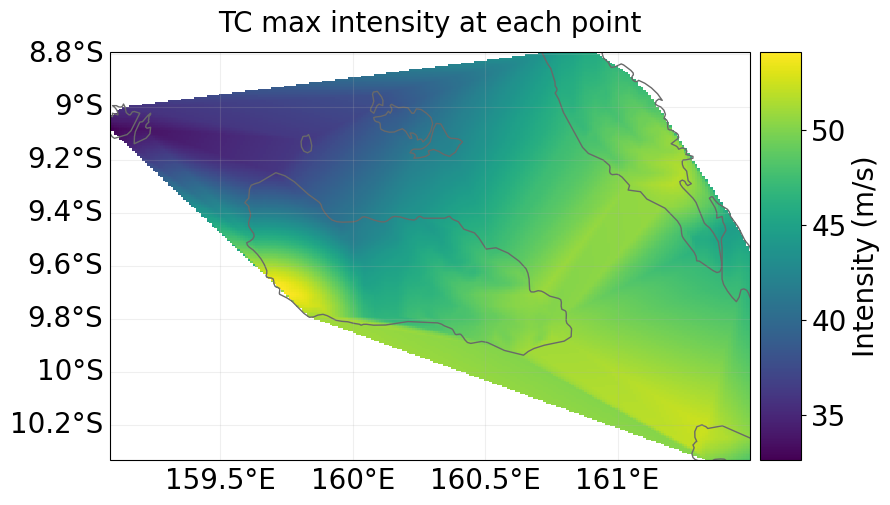

In [8]:
# show the data of different hazard types, given longitudes and latitudes
# Tropical Cyclone
tc_SI = client.get_hazard('tropical_cyclone',properties={'country_name':'Solomon Islands','climate_scenario': 'rcp45', 'ref_year':'2040','nb_synth_tracks':'10'})
tc = tc_SI.select(extent=[159, 161.5,  -10.40,-8.75])
tc.plot_intensity(0)

<GeoAxes: title={'center': 'WFseason max intensity at each point'}>

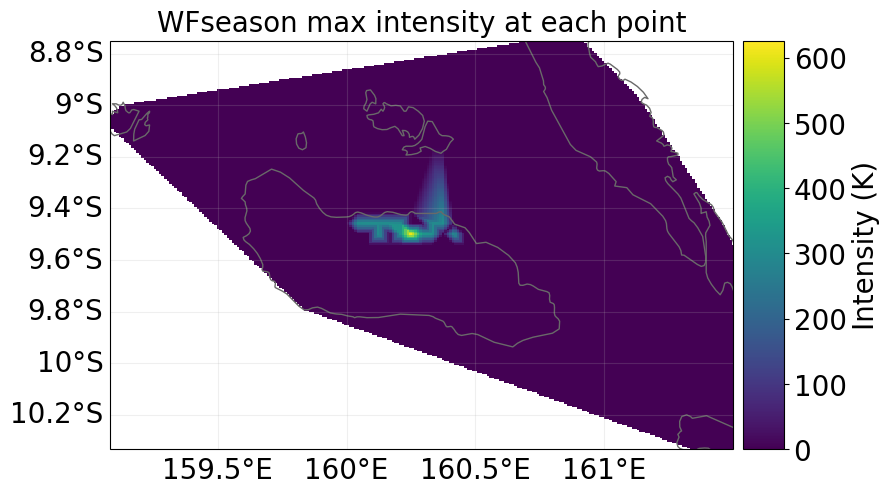

In [19]:
# Wildfire
wf = client.get_hazard('wildfire',properties={'country_name':'Solomon Islands'})
wf = wf.select(extent=[159, 161.5,  -10.40,-8.75])
wf.plot_intensity(0)

<GeoAxes: title={'center': 'RF max intensity at each point'}>

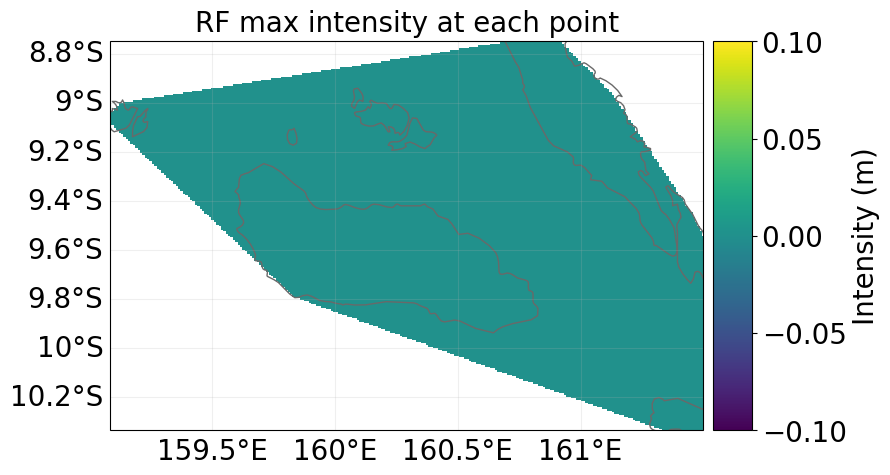

In [22]:
# River Flood
# 'river_flood', 'tropical_cyclone', 'storm_europe', 'relative_cropyield', 'wildfire', 'earthquake', 'flood
wf = client.get_hazard('river_flood',properties={'country_name':'Solomon Islands','climate_scenario': 'historical'})
wf = wf.select(extent=[159, 161.5,  -10.40,-8.75])
wf.plot_intensity(0)

<GeoAxes: title={'center': 'EQ max intensity at each point'}>

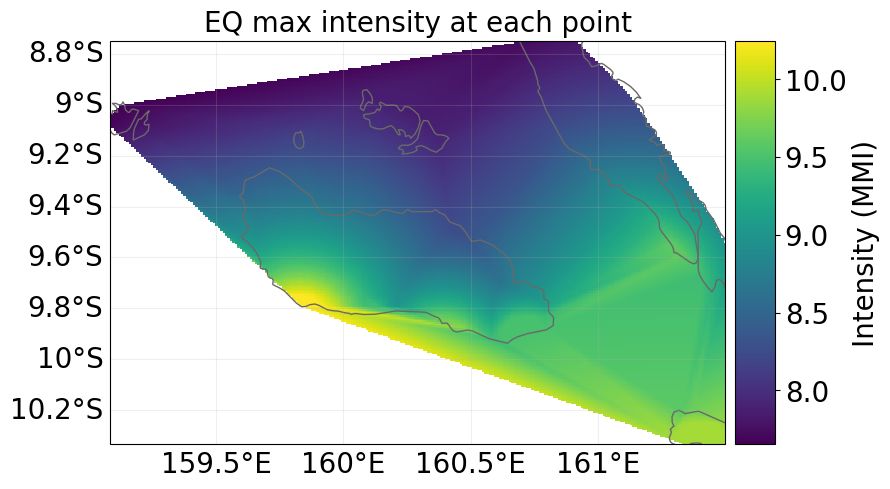

In [24]:
# Earthquake
wf = client.get_hazard('earthquake',properties={'country_name':'Solomon Islands'})
wf = wf.select(extent=[159, 161.5,  -10.40,-8.75])
wf.plot_intensity(0)

In the above exploration process, we focus on the area constrained by given coordinates. 

There are in total 9 hazard types provided by CLIMADA Data API, and for this specific area, only some of them are available(river flood, earthquake, wildfire and tropical cyclone).